In [1]:
import numpy as np
import sklearn, os, sys
from sklearn import svm
from skimage import data, io, filters
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data
from utils import plot

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
dataset = data.init_dataset()
labels = dataset.labels
dataset.train[0:3]

['84accc2dc9f5bb3ebee89fe1bf23639c.jpg',
 '14cffe576239620f1733dfe487dbaa6f.jpg',
 'cc93915e06bc55626a02af95006a48c2.jpg']

['great_dane', 'irish_terrier', 'afghan_hound', 'kerry_blue_terrier', 'great_dane', 'norfolk_terrier', 'chesapeake_bay_retriever', 'french_bulldog', 'borzoi', 'affenpinscher']


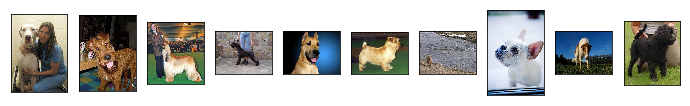

In [4]:
x_train = []
y_train = []
i = 16
for i,img_name in enumerate(dataset.train[i:i+10]):
    img = data.read_img('train/',img_name)
    x_train.append(img)
    id_ = img_name.split('.')[0]
    breed = labels.loc[labels['id'] == id_]
    y_train.append(breed['breed'].item())


plot.multiple(x_train)
print(y_train)

In [5]:
face_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../haarcascades/haarcascade_eye.xml')
face_cascade

<CascadeClassifier 0x12424bbf0>

In [6]:
os.listdir('../haarcascades')

['haarcascade_upperbody.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_profileface.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_eye.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_smile.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_eye_tree_eyeglasses.xml']

In [7]:
img_name = '../datasets/train/' + dataset.train[16]
img_name

'../datasets/train/365020fbc3a02a725b3a682ef6899673.jpg'

In [8]:
img = cv2.imread(img_name)
type(img)

numpy.ndarray

In [9]:
gray = cv2.cvtColor(img, 6) # COLOR_BGR2GRAY

In [10]:
faces = eye_cascade.detectMultiScale(gray, 1.3, 5)

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [12]:
real_faces = []
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    if len(eyes) > 1:
        real_faces.append([x,y,w,h])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


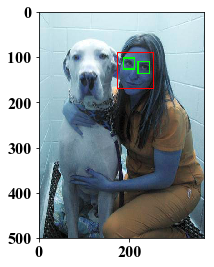

In [13]:
# cv2.imshow('img',img)
skimage.io.imshow(img)

In [14]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Remove faces from img

In [22]:
# some img mutation functions

def replace(v1,v2):
    return v2

def add(v1,v2):
    # mean of r,g,b
    return np.mean([v1,v2] ,axis=0)
    # return v1 + np.minimum(v1, v2) / 2

def overlay(v1,v2):
    # add smallest element values
    intermediate = np.minimum(v1, v2)
    return v1 + intermediate # np.minimum(v1,v2)

def random_img(dims=(10,10,3)):
    img = np.random.random(dims)
    img = np.clip(img,0,255)
    print(img)
    return img

def convert_coordinates(x,y,shape):
    w,h = shape[0:2]
    y = h - y
    return x,y

In [23]:
# for every img
f = replace
for (x,y,w,h) in real_faces:
    x,y = convert_coordinates(x,y,img.shape)
    print(x,y,w,h)
    dims = (w,h,3) # rgb = 3
    box = random_img(dims)
    print('shape',box.shape)
    w = 50
    h = 50
    # img = add_random(img,replace,dims)
    # xs = np.clip(np.arange(x,x + w), 0, x + w - 1)
    # ys = np.clip(np.arange(y,y + h), 0, y + h - 1)
    xs = np.arange(x, x - w)
    ys = np.arange(y, y - h)
    for i,x1 in enumerate(xs): 
        for j,y1 in enumerate(ys):
            img[x1,y1] = f(img[x1,y1],box[i,j])

172 274 79 79
[[[0.94314133 0.42662797 0.33220096]
  [0.9309438  0.63129866 0.2556716 ]
  [0.92873024 0.17321206 0.43505261]
  ...
  [0.01466816 0.3078599  0.01067749]
  [0.0130368  0.00389002 0.03757907]
  [0.54339224 0.25083526 0.5770372 ]]

 [[0.28787432 0.30907389 0.08227784]
  [0.74632111 0.84488504 0.72180151]
  [0.11290372 0.23035311 0.92350821]
  ...
  [0.66616881 0.54708855 0.39605888]
  [0.56656404 0.45287476 0.3647176 ]
  [0.64610054 0.78267285 0.45138143]]

 [[0.96688236 0.42050701 0.62742781]
  [0.70116351 0.86308474 0.81263744]
  [0.67940444 0.42561954 0.36963726]
  ...
  [0.59071497 0.27130247 0.79847559]
  [0.68957762 0.84849805 0.52702551]
  [0.13580796 0.19810019 0.4151682 ]]

 ...

 [[0.62090885 0.37798676 0.0136665 ]
  [0.16223357 0.21472433 0.24844263]
  [0.21292117 0.9530609  0.49496493]
  ...
  [0.24690655 0.47066684 0.97614828]
  [0.5728034  0.61972256 0.94858289]
  [0.22018644 0.96257693 0.52822422]]

 [[0.88339203 0.67033989 0.40288411]
  [0.03395531 0.3738721

In [17]:
np.arange(10,15)

array([10, 11, 12, 13, 14])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


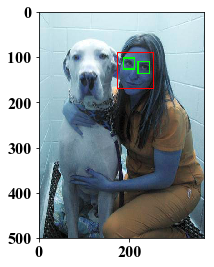

In [18]:
skimage.io.imshow(img)